# Actual over theoretical yield

## Figure 12 from thermal analysis paper

- Path to original figure script: /Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_12_neutron_output_vs_beam_power_noLeakageCurrent/Figure_12_neutron_output_vs_beam_power_noLeakageCurrent.py

- Path to the datafile: /Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_12_neutron_output_vs_beam_power_noLeakageCurrent/df.csv

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy.interpolate import interp1d

import glob
import re
import copy

# Experimental data from NeutronOutput_vs_BeamPower

02_PhD/01.github/phd/18.New_chamber_analysis/10.2020-02-03.NeutronOutput_vs_BeamPower.ipynb

In [2]:
data = pd.read_csv('/Users/hkromer/02_PhD/02_Data/13.new_chamber/2020-02-03.NeutronOutputVSBeamPower/data_cleaned.csv')

data.columns

Index(['t0', 't1', 'tdiff', 'HV_voltage_m', 'HV_current_m', 'HV_voltage_std',
       'HV_current_std', 'dose_corrected_m', 'dose_corrected_std',
       'HV_current_real', 'power', 'power_std', 'neutron_output',
       'neutron_output_std', 'ratio', 'ratio_std'],
      dtype='object')

# Theoretical neutron yield per mA and per s

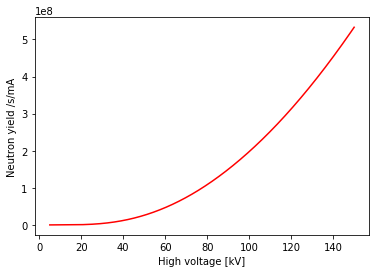

In [3]:
# import the neutron yield dataframe from the thick target calculation

df_neutronYield = pd.read_csv('/Users/hkromer/02_PhD/02_Data/neutron_yield_per_mA_per_s.csv')
# energy dEdx xs dYdE Y [total neutron yield per mA and per s]
interp_neutronYield = interp1d(df_neutronYield['energy'], df_neutronYield['Y'], kind='cubic', fill_value='extrapolate')
x = np.linspace(5, 150, 1000, endpoint=True)
plt.plot(x, interp_neutronYield(x), color='red')

plt.xlabel('High voltage [kV]')
plt.ylabel('Neutron yield /s/mA')
plt.show()

In [4]:
data['output_theoretical_per_s_mA'] = interp_neutronYield(data['HV_voltage_m'].values)
# output in n/s/mA
data['output_theoretical_per_s'] = data['output_theoretical_per_s_mA'].values *  data['HV_current_real'].values

# output over theoretical output
data['output_fraction'] = data['neutron_output'].values / data['output_theoretical_per_s'].values
cols = ['HV_voltage_m', 'HV_current_real', 'neutron_output', 'output_theoretical_per_s', 'output_fraction']
data[cols]

,HV_voltage_m,HV_current_real,neutron_output,output_theoretical_per_s,output_fraction
0,55.000000,0.531169,0.000000e+00,1.884388e+07,0.000000
1,55.970590,0.531693,0.000000e+00,1.994657e+07,0.000000
2,61.461676,0.536017,1.811463e+06,2.693683e+07,0.067249
3,65.000000,0.538865,4.635503e+06,3.208939e+07,0.144456
4,69.066980,0.545760,5.747498e+06,3.891161e+07,0.147707
5,70.000000,0.543904,6.384536e+06,4.033361e+07,0.158293
6,71.906065,0.544256,6.862269e+06,4.364083e+07,0.157244
7,74.848500,0.545267,8.779445e+06,4.906869e+07,0.178922
8,80.000000,0.547053,1.017031e+07,5.940874e+07,0.171192
9,80.000000,0.546698,1.118650e+07,5.937012e+07,0.188420


In [5]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [6]:
# datafile from COMSOL
path_to_data = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_12_neutron_output_vs_beam_power_noLeakageCurrent/'
output_folder = '/Users/hkromer/polybox/Thesis/Chapters/FurtherNeutronGeneratorUpgrades/Figures/Output_actual_theoretical/'
FIGNAME = 'Output_actual_theoretical'

In [7]:
df = pd.read_csv(f'{path_to_data}/df.csv', index_col=0)
df.head()

,HV_voltage,HV_current,beam_power,beam_power_leakage_current,dose_corr,output,output_theoretical_per_mA,output_theoretical,output_theoretical_leakage_current,output_fraction,output_fraction_leakage_current
time,,,,,,,,,,,
2017-12-21 13:59:00,0.505932,0.010508,0.005317,-0.070573,2.910625,8.763032e+04,0.000000e+00,0.000000e+00,-0.000000e+00,inf,-inf
2017-12-21 14:00:00,12.223167,0.073667,0.900440,-0.933035,2.218085,6.677997e+04,2.709777e+04,1.996203e+03,-2.068463e+03,33.453505,-32.284823
2017-12-21 14:01:00,42.134333,0.211167,8.897367,2.577217,-3.294699,-9.919365e+04,1.436727e+07,3.033889e+06,8.787982e+05,-0.032695,-0.112874
2017-12-21 14:02:00,70.723729,0.350678,24.801253,14.192694,24.205141,7.287452e+05,7.641474e+07,2.679697e+07,1.533476e+07,0.027195,0.047522
2017-12-21 14:03:00,80.377333,0.378667,30.436217,18.379617,132.888918,4.001707e+06,1.100317e+08,4.166532e+07,2.516057e+07,0.096044,0.159047


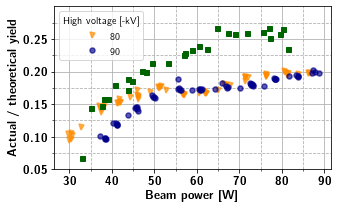

In [8]:
# -------------------------------------------------------------------
# plot ratio actual / theoretical yield
# -------------------------------------------------------------------
# without and with leakage current correction

plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

fig = plt.figure(figsize=(8*0.60,5*0.60))

# axis 1
ax1 = fig.add_subplot(1, 1, 1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# take only reasonable data
df1 = df[ ((df.index >= "2017-12-21 14:03") & (df.index <= "2017-12-21 15:06"))]
df2 = df[((df.index >= "2017-12-21 15:15") & (df.index <= "2017-12-21 16:14"))]

ax1.plot(df1['beam_power'], df1['output_fraction'], 'v',color="darkorange", markersize=5, label='80', alpha=0.65, markeredgewidth=1.5, markeredgecolor='darkorange')
ax1.plot(df2['beam_power'], df2['output_fraction'], 'o',color="darkblue", markersize=5, label = '90', alpha=0.65, markeredgewidth=1.5, markeredgecolor='darkblue')
ax1.plot(data['power'], data['output_fraction'], 's', color='darkgreen', markersize=5)
plt.ylim(0.05,0.30)
ax1.yaxis.set_ticks(np.arange(0.05,0.25+0.05,0.05))
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)
# tick font size
ax1.tick_params('x', colors='black', labelsize=12)	
ax1.tick_params('y', colors='black', labelsize=12)	

ax1.set_ylabel(r'\textbf{Actual / theoretical yield}', fontsize=12)
ax1.set_xlabel(r'\textbf{Beam power [W]}', fontsize=12, labelpad=2)



ax1.grid(b=True, which='major', linestyle='-')#, color='gray')
ax1.grid(b=True, which='minor', linestyle='--')#, color='gray')
l1 = plt.legend(loc="best",  fontsize=10)
l1.set_title(r"High voltage [-kV]", prop = {'size': 10})

plt.tight_layout()
# plt.savefig(f'{output_folder}/{FIGNAME}.pdf', dpi=900)

plt.show()

# Comparison with Roberts Data
- Roberts datafiles in: /Users/hkromer/02_PhD/02_Data/07.neutron_output/data_from_Robert/


In [9]:
# output (neutrons/s)
output_data_file = '/Users/hkromer/02_PhD/02_Data/07.neutron_output/data_from_Robert/output_neutronsPerSecond.csv'
output_data = pd.read_csv(output_data_file)
# output per unit power (neutrons/s/W)
output_vs_power_file = '/Users/hkromer/02_PhD/02_Data/07.neutron_output/data_from_Robert/output_vs_power_neutronsPerSecondPerWatt.csv'
output_vs_power = pd.read_csv(output_vs_power_file)
#hv=60:5:125; % high voltage values in kV
hv = np.arange(60, 130, 5)
power = output_data / output_vs_power # beam power in W

In [10]:
expr_file = '/Users/hkromer/02_PhD/02_Data/07.neutron_output/data_from_Robert/expr.csv'
expr = pd.read_csv(expr_file, delimiter='\t')

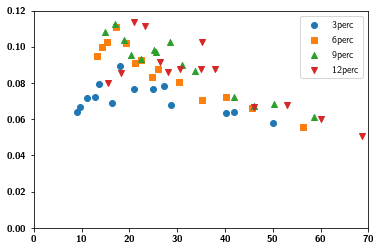

In [11]:
cols = power.columns.tolist()
markers = ['o', 's', "^", "v"]
for col, marker in zip(cols, markers):
    plt.scatter(power.loc[:,col], expr.loc[:,col]/100.0, marker=marker, label=col)

plt.ylim(0, 0.12)
plt.xlim(0, 70)
plt.legend(loc='best')


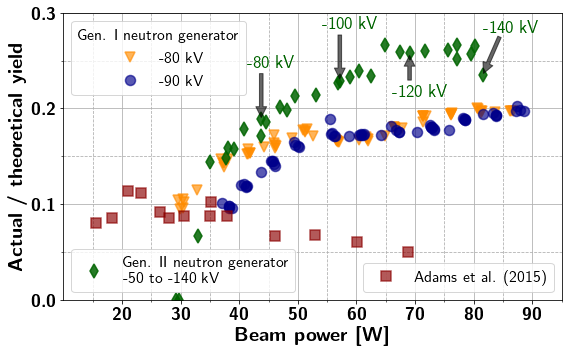

In [71]:
# -------------------------------------------------------------------
# plot ratio actual / theoretical yield
# -------------------------------------------------------------------
# without and with leakage current correction

plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

fig = plt.figure(figsize=(8,5))
fs = 20
# axis 1
ax1 = fig.add_subplot(1, 1, 1)
# Hide the right and top spines
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# take only reasonable data
df1 = df[ ((df.index >= "2017-12-21 14:03") & (df.index <= "2017-12-21 15:06"))]
df2 = df[((df.index >= "2017-12-21 15:15") & (df.index <= "2017-12-21 16:14"))]

ax1.plot(df1['beam_power'], df1['output_fraction'], 'v',color="darkorange", markersize=10, label='-80 kV', alpha=0.65, markeredgewidth=1.5, markeredgecolor='darkorange')
ax1.plot(df2['beam_power'], df2['output_fraction'], 'o',color="darkblue", markersize=10, label = '-90 kV', alpha=0.65, markeredgewidth=1.5, markeredgecolor='darkblue')


plt.ylim(0,0.3)
plt.xlim(10,95)
ax1.yaxis.set_ticks(np.arange(0.0,0.25+0.1,0.1))
ax1.xaxis.set_ticks(np.arange(20,100,10))
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)
# tick font size
ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	

ax1.set_ylabel(r'\textbf{Actual / theoretical yield}', fontsize=fs)
ax1.set_xlabel(r'\textbf{Beam power [W]}', fontsize=fs, labelpad=2)


ax1.grid(b=True, which='major', linestyle='-')#, color='gray')
ax1.grid(b=True, which='minor', linestyle='--')#, color='gray')
leg1 = plt.legend(loc="upper left",  fontsize=fs-4)
leg1.set_title(r"Gen. I neutron generator", prop = {'size': fs-4})

col = '12perc'
marker = 's'
plot_adams, = ax1.plot(power.loc[:,col], expr.loc[:,col]/100.0, color='darkred', linestyle='None', markeredgecolor='darkred', markersize=10, alpha=0.65, markeredgewidth=1.5, marker=marker)
leg2 = ax1.legend([plot_adams],['Adams et al. (2015)'], loc='lower right', fontsize=fs-4)

plot_new, = ax1.plot(data['power'], data['output_fraction'], 'd', color='darkgreen', markersize=10, label = '90', alpha=0.85, markeredgewidth=1.5, markeredgecolor='darkgreen')
leg3 = ax1.legend([plot_new],['Gen. II neutron generator \n -50 to -140 kV'], loc="lower left", fontsize=fs-4)

x = 43.764280 # power
hv = -80 # hv
y = 0.188420 # ratio
ax1.text(x-2.5,y+0.055,f"{hv} kV", fontsize=18, fontweight='bold', color='darkgreen')
#     ax1.arrow(x,y+2.5,0,-1, color='red', length_includes_head=True, head_width=0.6) 
ax1.annotate(s=None, fontsize=18, xy=(x,y), xytext=(x,y+0.05),
        arrowprops=dict(arrowstyle='simple, head_length=0.6,head_width=0.6,tail_width=0.2', color='black', alpha=0.6), va='center', color="darkgreen", alpha=0.6)

hv = -100 # hv
x = 57.159928 # power
y = 0.228735 # ratio
ax1.text(x-3,y+0.055,f"{hv} kV", fontsize=18, fontweight='bold', color='darkgreen')
#     ax1.arrow(x,y+2.5,0,-1, color='red', length_includes_head=True, head_width=0.6) 
ax1.annotate(s=None, fontsize=18, xy=(x,y), xytext=(x,y+0.05),
        arrowprops=dict(arrowstyle='simple, head_length=0.6,head_width=0.6,tail_width=0.2', color='black', alpha=0.6), va='center', color="darkgreen", alpha=0.6)

hv = -120 # hv
x = 69.06193 # power
y = 0.257449 # ratio
ax1.text(x-3,y-0.045,f"{hv} kV", fontsize=18, fontweight='bold', color='darkgreen')
#     ax1.arrow(x,y+2.5,0,-1, color='red', length_includes_head=True, head_width=0.6) 
ax1.annotate(s=None, fontsize=18, xy=(x,y), xytext=(x,y-0.03),
        arrowprops=dict(arrowstyle='simple, head_length=0.6,head_width=0.6,tail_width=0.2', color='black', alpha=0.6), va='center', color="darkgreen", alpha=0.6)

hv = -140 # hv
x = 81.546383 # power
y = 0.234587 # ratio
ax1.text(x,y+0.045,f"{hv} kV", fontsize=18, fontweight='bold', color='darkgreen')
#     ax1.arrow(x,y+2.5,0,-1, color='red', length_includes_head=True, head_width=0.6) 
ax1.annotate(s=None, fontsize=18, xy=(x,y), xytext=(x+3,y+0.042),
        arrowprops=dict(arrowstyle='simple, head_length=0.6,head_width=0.6,tail_width=0.2', color='black', alpha=0.6), va='center', color="darkgreen", alpha=0.6)



# Manually add the first legend back
ax1.add_artist(leg1)
ax1.add_artist(leg2)

plt.tight_layout()
plt.savefig(f'{output_folder}/{FIGNAME}_w_Robert.pdf', dpi=900)

plt.show()

In [46]:
hv = 140
data[['HV_voltage_m', 'power', 'output_fraction']].loc[ (data['HV_voltage_m'] < hv+3) & ((data['HV_voltage_m'] > hv-3)) ]

,HV_voltage_m,power,output_fraction
29,138.186167,81.546383,0.234587


In [23]:
data.columns

Index(['t0', 't1', 'tdiff', 'HV_voltage_m', 'HV_current_m', 'HV_voltage_std',
       'HV_current_std', 'dose_corrected_m', 'dose_corrected_std',
       'HV_current_real', 'power', 'power_std', 'neutron_output',
       'neutron_output_std', 'ratio', 'ratio_std',
       'output_theoretical_per_s_mA', 'output_theoretical_per_s',
       'output_fraction'],
      dtype='object')